In [1]:
import numpy as np
from utils import train, evaluate
from scipy.optimize import minimize, minimize_scalar

Training Mode: MR: 100%|██████████| 50000/50000 [00:32<00:00, 1549.56it/s, games_played=5888]


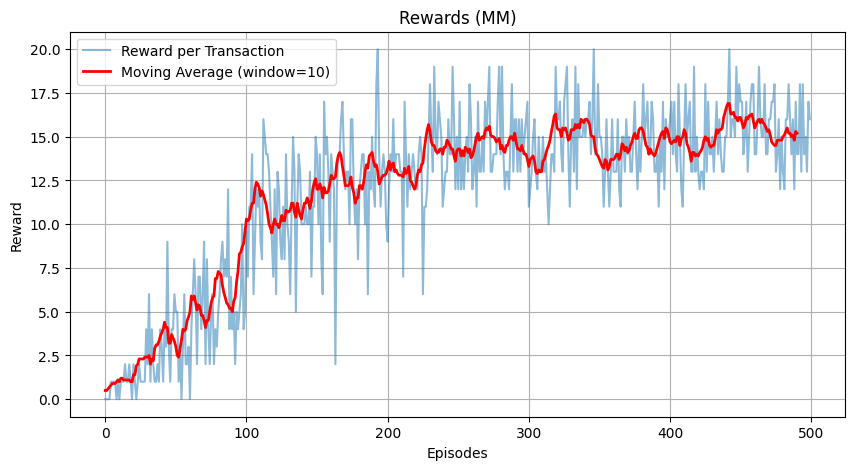

In [2]:
params = {
    'total_steps': 50000,
    'eval_intervals': 1000,
    'min_power': 0.1,
    'max_power': 1,
    'min_price': 0.1,
    'max_price': 1,
    'gen_threshold': 0.1,
    'con_threshold': 15,
    'agent1_actions': [-0.1, 0.0, 0.1],
    'agent2_actions': [-0.1, 0.0, 0.1],
    'a': 0.1,
    'b': 2,
    'c': 0,
    'agent1_id': 'G',
    'agent2_id': 'C'
}

agent_G_trained, agent_C_generic, reward_history, profit_history, ag1_win, ag2_win = train(mode='MR', kwargs=params)


In [3]:
print(ag1_win, ag2_win)

5888 0


In [6]:
# Define the function
def f(vars):
    x, y = vars
    return  x*y - ( 0.1 * x**2 + 2 * x)
    # return -((x-2)**2+(y-2)**2)+4

# Bounds (choose a reasonable domain for x and y)
bounds = [(params['min_power'], params['max_power']), (params['min_price'], params['max_price'])]

# Minimize
res_min = minimize(f, x0=(0, 0), bounds=bounds)

# To find max, minimize the negative of f
res_max = minimize(lambda vars: -f(vars), x0=(0, 0), bounds=bounds)


print("Maximum:")
print(f"Point: {res_max.x}, Value: {-res_max.fun}")

eval_params = params.copy()
eval_params.update({
    'init_gen_power': 0.5,
    'init_con_price': 0.5,
    'total_steps': 100
})

power_hist = []
price_hist = []

for _ in range(100):
    gen_power, con_price = evaluate(agent_G_trained, agent_C_generic, eval_params, plot=False)
    power_hist.append(gen_power)
    price_hist.append(con_price)


x = np.mean(power_hist)
y = np.mean(price_hist)

profit = x*y - ( 0.1 * x**2 + 2 * x)

print(f"Mean point: {x,y}, Value; {profit}")

Maximum:
Point: [0.1 1. ], Value: -0.101
Mean point: (0.1383, 0.6122), Value; -0.19384542900000004


Training Mode: MM: 100%|██████████| 50000/50000 [01:04<00:00, 773.11it/s, games_played=8372]


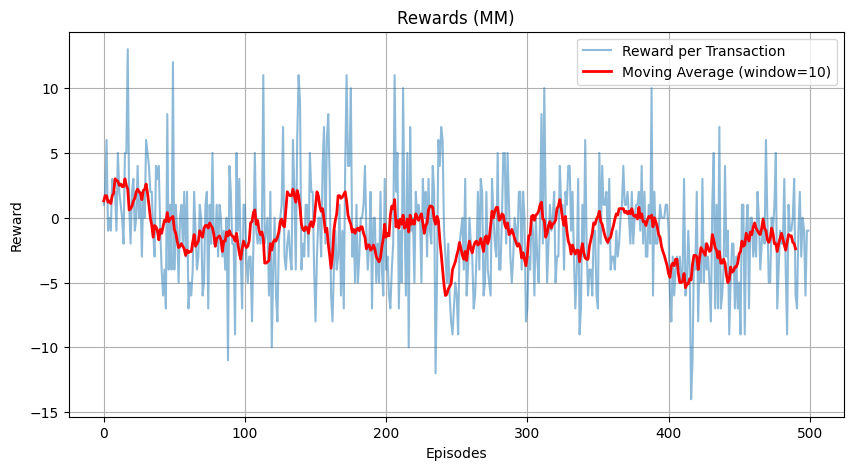

In [ ]:
params = {
    'total_steps': 50000,
    'eval_intervals': 100,
    'min_power': 0.1,
    'max_power': 1,
    'min_price': 0.1,
    'max_price': 1,
    'gen_threshold': -0.2,
    'con_threshold': 2,
    'agent1_actions': [-0.1, 0.0, 0.1],
    'agent2_actions': [-0.1, 0.0, 0.1],
    'a': 0.1,
    'b': 2,
    'c': 0,
    'agent1_id': 'C',
    'agent2_id': 'G'
}
agent_C_trained, agent_G_generic, reward_history, profit_history, ag1_win, ag2_win = train(mode='MR', kwargs=params)

In [34]:
print(ag1_win, ag2_win)

3906 4466


In [35]:
eval_params = params.copy()
eval_params.update({
    'init_gen_power': 0.5,
    'init_con_price': 0.5,
    'total_steps': 100,

})

# Define the function
def f(vars):
    x, y = vars
    return  x*1/np.log(1+y)
    # return -((x-2)**2+(y-2)**2)+4

# Bounds (choose a reasonable domain for x and y)
bounds = [(params['min_power'], params['max_power']), (params['min_price'], params['max_price'])]

# Minimize
res_min = minimize(f, x0=(0, 0), bounds=bounds)

# To find max, minimize the negative of f
res_max = minimize(lambda vars: -f(vars), x0=(0, 0), bounds=bounds)

print("Maximum:")
print(f"Point: {res_max.x}, Value: {-res_max.fun}")


power_hist = []
price_hist = []

for _ in range(100):
    gen_power, con_price = evaluate(agent_C_trained, agent_G_generic, eval_params, plot=False)
    power_hist.append(gen_power)
    price_hist.append(con_price)


x = np.mean(power_hist)
y = np.mean(price_hist)

profit = x*1/np.log(1+y)

print(f"Mean point: {x,y}, Value; {profit}")

Maximum:
Point: [1.  0.1], Value: 10.492058687257062
Mean point: (0.2457, 0.35080000000000006), Value; 0.8171015747201134


In [36]:
eval_params = params.copy()
eval_params.update({
    'init_gen_power': 0.5,
    'init_con_price': 0.5,
    'total_steps': 100,
    'gen_threshold': -0.2,
    'con_threshold': 2,
    'agent1_id': 'G',
    'agent2_id': 'C'
})

# Define the function
def f(vars):
    x, y = vars
    return  x*1/np.log(1+y) + x*y - ( 0.1 * x**2 + 2 * x)
    # return -((x-2)**2+(y-2)**2)+4

# Bounds (choose a reasonable domain for x and y)
bounds = [(params['min_power'], params['max_power']), (params['min_price'], params['max_price'])]

# Minimize
res_min = minimize(f, x0=(0, 0), bounds=bounds)

# To find max, minimize the negative of f
res_max = minimize(lambda vars: -f(vars), x0=(0, 0), bounds=bounds)

print("Maximum:")
print(f"Point: {res_max.x}, Value: {-res_max.fun}")


power_hist = []
price_hist = []

for _ in range(100):
    gen_power, con_price = evaluate(agent_C_trained, agent_G_trained, eval_params, plot=False)
    power_hist.append(gen_power)
    price_hist.append(con_price)


x = np.mean(power_hist)
y = np.mean(price_hist)

profit = x*1/np.log(1+y)

print(f"Mean point: {x,y}, Value; {profit}")

Maximum:
Point: [1.  0.1], Value: 8.492058687257062
Mean point: (0.24750000000000008, 0.2116), Value; 1.2894533644030337


Generator 10 last mean 0.6
Consummer 10 last mean 0.4


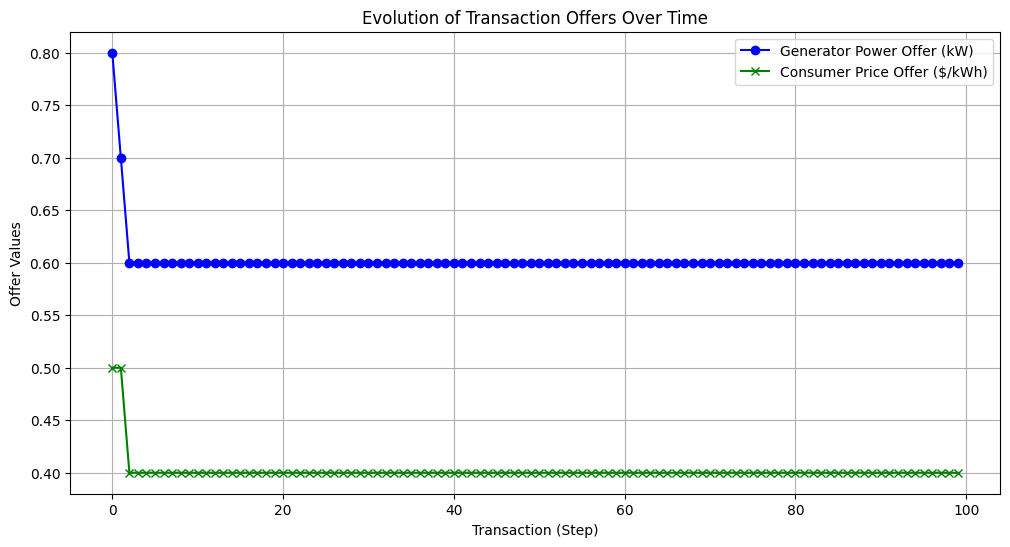

In [42]:
evaluate(agent_C_trained, agent_G_trained, eval_params, plot=True)

In [ ]:
import numpy as np 
x = 1
y = 0.1
x*1/np.log(1+y)

10.492058687257062

In [1]:
params = {
    'total_steps': 10000,
    'eval_intervals': 100,
    'init_gen_power': 0.5,
    'init_con_price': 0.5,
    'min_power': 0.1,
    'max_power': 1,
    'min_price': 0.1,
    'max_price': 1,
    'threshold': 10,
    'gen_actions': [-0.1, 0.0, 0.1],
    'con_actions': [-0.1, 0.0, 0.1],
    'a': 0.1,
    'b': 2,
    'c': 0,
    'agent1_id': 'G',
    'agent2_id': 'C'
}

total_steps = params.get('total_steps', 100)
init_gen_power = params.get('init_gen_power', 0.3)
init_con_price = params.get('init_con_price', 2.0)
min_power = params.get('min_power', 0.1)
max_power = params.get('max_power', 5)
min_price = params.get('min_price', 0.1)
max_price = params.get('max_price', 5)
threshold = params.get('threshold', 1)
gen_actions = params.get('gen_actions', [-0.1, 0.0, 0.1])
con_actions = params.get('con_actions', [-1, 0, 1])
a = params.get('a', 0.1)
b = params.get('b', 2)
c = params.get('c', 0)


from energy_market_env import EnergyMarketEnv
env = EnergyMarketEnv(a, b, c, 
                    min_power, max_power,
                    min_price, max_price, 
                    gen_threshold=-0.5, con_threshold = 10,
                    agent_id='G')

env.gen_power = 1
env.con_price = 0.1


actions = {
    'G': 0,
    'C': 0
}

env.step(actions=actions, agent_id='G')

((1.0, 0.1), {'G': -1, 'C': 1}, True)

In [29]:
env.con_profit

10.492058687257062

In [25]:
import numpy as np
x = env.gen_power
y = env.con_price
x*1/np.log(1+y)

10.492058687257062

In [26]:
x = env.gen_power
y = env.con_price
x*y - ( 0.1 * x**2 + 2 * x)

-2.0

In [ ]:
env.step({'generator': 0, 'consumer': -0})


TypeError: step() missing 1 required positional argument: 'agent_id'

In [ ]:
print(env.gen_power, env.con_price)

0.9 0.3


In [ ]:
env.con_profit

3.4303452180375613

In [ ]:
gen_power = env.gen_power
con_price = env.con_price
gen_power * np.log(1/(1+con_price))

-0.236127838020742

In [ ]:
import random
  
GENERATOR_ACTIONS = gen_actions  # Power adjustments
CONSUMER_ACTIONS = con_actions         # Price adjustments

gen_states = []
con_states = []

gen_state, con_state = env.reset()
state = (gen_state, con_state)

next_state = state

print(state)

(0.6, 0.4)


In [ ]:


    
gen_states.append(next_state[0])
con_states.append(next_state[1])

action_G = agent_G.select_action(state, evaluate=True)
if agent_C is None:
    action_C = random.choice(CONSUMER_ACTIONS)
else:
    action_C = agent_C.select_action(state, evaluate=True)

next_state, reward, _ = env.step({'generator': action_G, 'consumer': action_C})

print(state, action_C, next_state)

state = next_state


NameError: name 'agent_G' is not defined

In [ ]:
round(random.uniform(1.5, 3.7), 1)

3.2